$$\text{Original: }\frac{{dP}}{{dt}} = r_P \cdot P(t) \cdot \left(1 - \frac{{P(t)}}{{K_P}}\right) \cdot \left(\frac{{F(t)}}{{K_F}}\right) - d_P \cdot P(t)$$

$${{N^{(t+1)}_i}} = {{N^{(t)}_i}} + r\cdot {{N^{(t)}_i}} (1-\frac{{N^{(t)}_i}}{{P_i}})$$

$$K_i^{(t+1)} = \max \left(\min \left(K_i^*,K_i^t + k(K_i^*-K_i^t)-u_i^t\right),0\right)$$

$$P_i = \sum_{i}\delta K_i$$

$$K^t = \sum_{i=1}^{M} u_i^t K_i^t$$


$$
u_i^t = \begin{cases}
1, & \text{if rank}(K_i^t) \leq P^t \\
0, & \text{otherwise}
\end{cases}
$$


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt 
import matplotlib.animation as animation


KeyboardInterrupt



### Simple Aggregated Equation

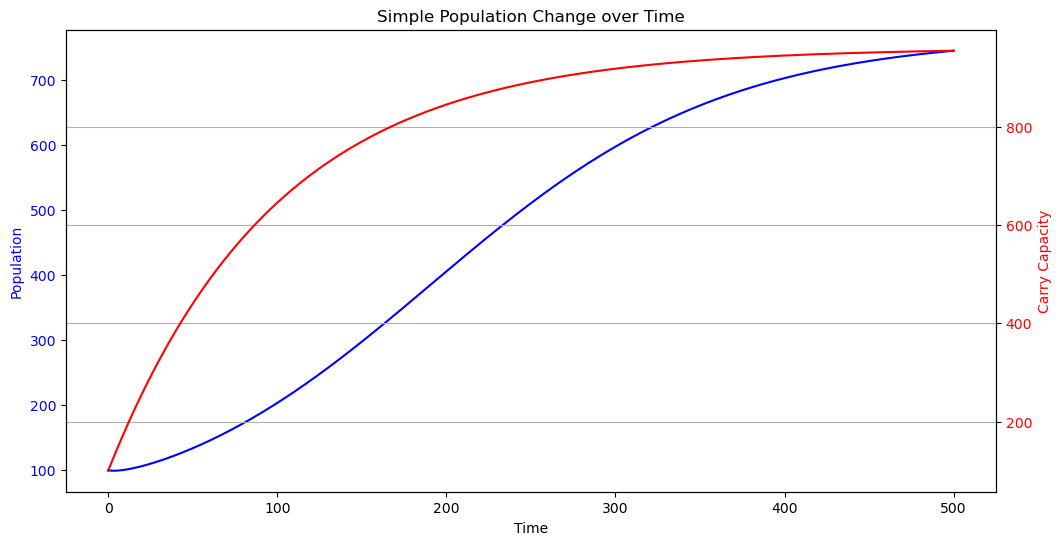

In [516]:

def simulate_population_modified(r, K_star, k, a, initial_population, simulation_time, delta):
    populations = [initial_population]  # Store population values over time
    P_values = [0]  # Store P values over time
    u_values = [0]  # Store u values over time
    K_values = [100]# Store k values over time
    
    for t in range(simulation_time):
        N_t = populations[-1]  # Get the population value at the previous time step
        K_t = K_values[-1]  # Get the K value at the previous time step

        # Update population using the first equation
        P = delta * K_t  # ????
        if P != 0:
            N_t_plus_1 = N_t + r * N_t * (1 - N_t / P)
        else:
            N_t_plus_1 = N_t

        # Calculate u value based on rank condition
        rank_condition = sorted(range(len(K_values)), key=lambda k: K_values[k])
        u_t = [1 if rank_condition[i] < P else 0 for i in range(len(K_values))]

        # Update K value using the second equation
        K_star_t = K_star
        max_term = max(0, K_t - a*u_t[0]) 
        K_t_plus_1 = min(K_star_t, k * K_star_t + (1 - k) * max_term)

        # Append the new values to the respective lists
        populations.append(N_t_plus_1)
        K_values.append(K_t_plus_1)
        P_values.append(P)
        u_values.append(u_t)

    return populations, K_values, P_values, u_values


def plot_population_simulation(r, K_star, k, a, initial_population, simulation_time, delta):
    populations, K, _, _ = simulate_population_modified(r, K_star, k, a, initial_population, simulation_time, delta)
    time_steps = range(simulation_time + 1)

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot population on the first y-axis
    ax1.plot(time_steps, populations, color='blue', label='Population')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Population', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create a secondary y-axis and plot carry capacity on it
    ax2 = ax1.twinx()
    ax2.plot(time_steps, K, color='red', label='Carry Capacity')
    ax2.set_ylabel('Carry Capacity', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    plt.grid()
    plt.title('Simple Population Change over Time')
    plt.show()

    
r = 0.0135
delta = 0.80
K_star = 1000
k = 0.01
a = 0.4
initial_population = 100
simulation_time = 500
plot_population_simulation(r, K_star, k, a, initial_population, simulation_time, delta)

### Land Division Situation

Max Family Size Range: 1 to 5


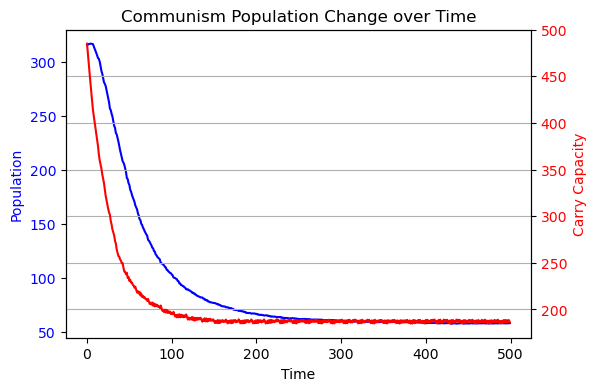

Max Family Size Range: 1 to 10


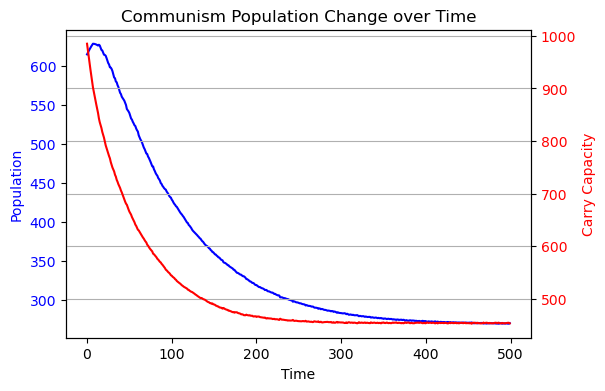

Max Family Size Range: 1 to 20


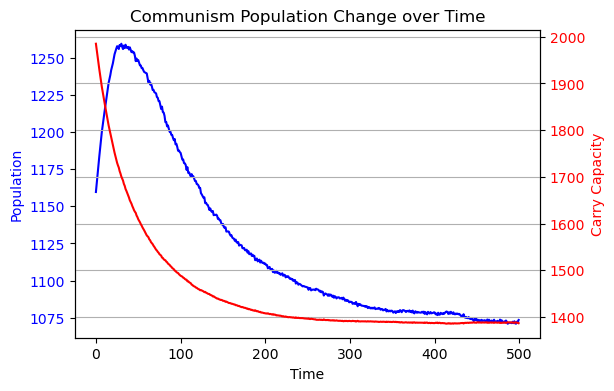

Max Family Size Range: 1 to 30


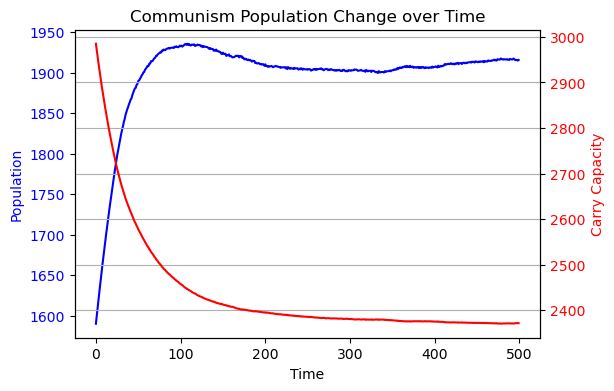

Max Family Size Range: 1 to 50


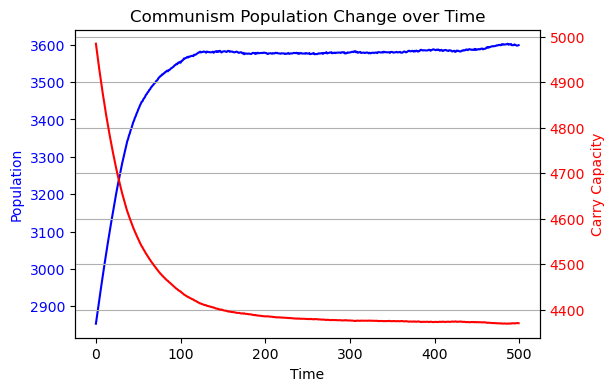

Max Family Size Range: 1 to 100


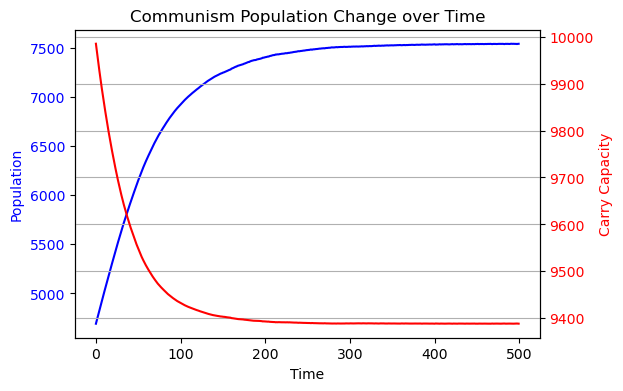

In [66]:
def communism_simulation_population(max_size_family, r, k, a, K_star, initial_land_and_family, simulation_time):
    
    def family_num(max_size_family):
        num_lst = np.arange(1, max_size_family + 1)  # Adjusted to include max_size_family
        weights = np.random.normal(0, 1, size=(max_size_family,))  # Generate weights for the entire population
        weights = np.absolute(weights)  # Ensure positive weights

        num = random.choices(num_lst, weights=weights, k=1)
        return sum(num)

    def carry_capacity(max_size_family): ####
        num_lst = np.arange(1, max_size_family + 1)  # Adjusted to include max_size_family
        weights = np.random.normal(0, 1, size=(max_size_family,))  # Generate weights for the entire population
        weights = np.absolute(weights)  # Ensure positive weights

        num = random.choices(num_lst, weights=weights, k=1)
        return sum(num)
    
    def carry_capacity2(max_size_family): #### all cells have the max capacity
        return max_size_family


    P_values = [[0] * initial_land_and_family for _ in range(simulation_time)] # total harvest capacity of the year (food)
    u_values = [[0] * initial_land_and_family for _ in range(simulation_time)] # using land or not decision
    K_values = [] #total land carry capacity
    
    land_assignments = {}  # dictionary to store land assignments
    k_values = [carry_capacity2(max_size_family) for _ in range(initial_land_and_family)] #randomly distribute the land capacity for each family in the zero year
    family = [family_num(max_size_family) for _ in range(initial_land_and_family)] #randomly distribute the family size for each family in the zero year
    initial_population = sum(family)
    populations = [initial_population]  # store population values over time

    land_assignments = {} 
    land_assignments[0] = {} # assigning land capacity to each family in the zero year
    for i in range(initial_land_and_family): 
                land_assignments[0][i+1] = {
                    'family': family[i],
                    'land': i+1, #land numbering
                    'carry_capacity': k_values[i]
                }

    ### Updating Process
    for t in range(1, simulation_time + 1): 

        land_assignments[t] = {} # adding a sub-dict in each year.
        for i in range(initial_land_and_family): 
                land_assignments[t][i+1] = {
                    'family': land_assignments[t-1][i+1]['family'],
                    'land': i+1, #land numbering
                    'carry_capacity': None
                }

        N_t = populations[-1]  # Get the population value at the previous time step. For the first year, it's the initial_population variable.
        K_t = [land_assignments[t-1][i]['carry_capacity'] for i in range(1, initial_land_and_family + 1)] #from the land_assignment dict, get all the land capacities in the looping year.
        family_value = [land_assignments[t-1][i]['family'] for i in range(1, initial_land_and_family + 1)] #from the land_assignment dict, get all the family size in the looping year.      
        u_t = [1 if K_t[i] >= family_value[i] else 0 for i in range(initial_land_and_family)] # get to use the land or not binary value u
        
        K_t_sum = sum(K_t) # the land carry capacity of the whole village
        P = sum([a*b for a,b in zip(K_t, u_t)]) # the harvest capacity of the whole village
        
        N_t_plus_1 = N_t + r * N_t * (1 - N_t / P) #### update the total population # the total population of the new year (this year is the new year)
        diff_pop = N_t_plus_1 - N_t #difference between original total population and the current new population

    #         updating family size 
        households = list(land_assignments[t].keys())

        if diff_pop > 0: #if the total population increases
            probabilities = [land_assignments[t-1][household]['carry_capacity'] / land_assignments[t-1][household]['family'] for household in households] # family size increase rate will be positively correlated with the land capacity/person
            extra_population = random.choices(households, probabilities, k=int(diff_pop))
            for household in extra_population: land_assignments[t][household]['family'] += 1

        if diff_pop < 0:  # if the total population decreases
            probabilities = [1 / (land_assignments[t-1][household]['carry_capacity'] / land_assignments[t-1][household]['family']) for household in households]  # family size decrease rate will be negatively correlated with the land capacity/person
            minus_population = random.choices(households, probabilities, k=int(abs(diff_pop)))
            for household in minus_population:
                if land_assignments[t][household]['family'] > 1:  # Only decrease population if there is more than one family member
                    land_assignments[t][household]['family'] -= 1


        K_star_t = K_star # the upper limit of each land cell capacity

    #         updating land capacity
        for i in range(1, initial_land_and_family + 1):
            
            max_term = max(0, land_assignments[t-1][i]['carry_capacity'] - a * u_t[i-1]) # deplation rate; adding max function to make sure the value is not negative
#             land_assignments[t][i]['carry_capacity'] = min(K_star_t, k * K_star_t + (1 - k) * max_term) # updating the land capacity of the whole; k is the land recovery rate 
            
            land_assignments[t][i]['carry_capacity'] = max(0, min(K_star_t, land_assignments[t-1][i]['carry_capacity'] + k * (K_star_t - land_assignments[t-1][i]['carry_capacity']) - a * u_t[i-1]))
            
        K_t_plus_1 = [land_assignments[t][i]['carry_capacity'] for i in range(1, initial_land_and_family + 1)] ## list of each land cell capacity (new year, this year)

        # Append the new values to the respective lists
        populations.append(N_t_plus_1)
        K_values.append(sum(K_t_plus_1)) # total land capacity
        P_values[t-1] = P # update the total harvest capacity
        u_values[t-1] = u_t # update the land usage (Y/N)

    populations = populations[1:] # exclude the zero year population 

    return populations, K_values, P_values, u_values, land_assignments

def plot_commuism_simulation_population(max_size_family, r, k, a, K_star, initial_land_and_family, simulation_time):
    
    populations, K, _, _, data = communism_simulation_population(max_size_family, r, k, a, K_star, initial_land_and_family, simulation_time)
    time_steps = range(simulation_time)

    fig, ax1 = plt.subplots(figsize=(6, 4))

    # Plot population on the first y-axis
    ax1.plot(time_steps, populations, color='blue', label='Population')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Population', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create a secondary y-axis and plot carry capacity on it
    ax2 = ax1.twinx()
    ax2.plot(time_steps, K, color='red', label='Carry Capacity')
    ax2.set_ylabel('Carry Capacity', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    plt.grid()
    plt.title('Communism Population Change over Time')
    plt.show()

r = 0.0135 # population birth rate
K_star = 12 # each land capacity ceiling
k = 0.02 # land recovery rate 
a = 0.15 # land deplation rate
simulation_time = 500 #simulation year
initial_land_and_family = 100
max_size_family = 10

for i in [5, 10, 20, 30, 50, 100]:
    print('Max Family Size Range: 1 to', i)
    max_size_family = i
    K_star = max_size_family # each land capacity ceiling
    plot_commuism_simulation_population(max_size_family, r, k, a, K_star, initial_land_and_family, simulation_time)
    
    

*To what an extend does family size influence the population steady state?*

#### Animation of the Communism Case

In [527]:

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

### Very Initial Scratch

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate population dynamics
def simulate_population(r_P, K_P, F, K_F, d_P, initial_population, simulation_time):
    time = np.arange(simulation_time)
    population = np.zeros(simulation_time)
    population[0] = initial_population

    for t in range(1, simulation_time):
        dPdt = r_P * population[t-1] * (1 - population[t-1]/K_P) * (F/K_F) - d_P * population[t-1]
        population[t] = population[t-1] + dPdt

    return time, population


def simulate_resource(r_F, K_F, c_F, d_F, initial_resource, population, simulation_time):
    time = np.arange(simulation_time)
    resource = np.zeros(simulation_time)
    resource[0] = initial_resource

    for t in range(1, simulation_time):
        dFdt = r_F * (1 - resource[t-1]/K_F) * (1 - c_F * population[t-1] * resource[t-1]) - d_F * resource[t-1]
        resource[t] = resource[t-1] + dFdt

    return time, resource

# Function to simulate water dynamics
def simulate_water(r_W, K_W, c_W, d_W, initial_water, population, simulation_time):
    time = np.arange(simulation_time)
    water = np.zeros(simulation_time)
    water[0] = initial_water

    for t in range(1, simulation_time):
        dWdt = r_W * (1 - water[t-1]/K_W)* (1 - c_W * population[t-1] * water[t-1]) - d_W * water[t-1]
        water[t] = water[t-1] + dWdt

    return time, water


In [ ]:
# Parameters for population dynamics
r_P = 0.02   # Intrinsic growth rate
K_P = 1000  # Carrying capacity
F = 1000     # Resource availability
K_F = 1000  # Maximum capacity of the resource
d_P = 0.05  # Death rate

# Parameters for resource dynamics
r_F = 0.4   # Regeneration rate of the resource
K_F = 1000  # Maximum capacity or availability of the resource
c_F = 0.001 # Consumption rate of the resource per individual in the population
d_F = 0.05  # Depletion rate of the resource

# Parameters for water dynamics
r_W = 0.4   # Regeneration rate of water resources
K_W = 3000  # Maximum capacity or availability of water resources
c_W = 0.001 # Consumption rate of water per individual in the population
d_W = 0.05  # Depletion rate of water resources

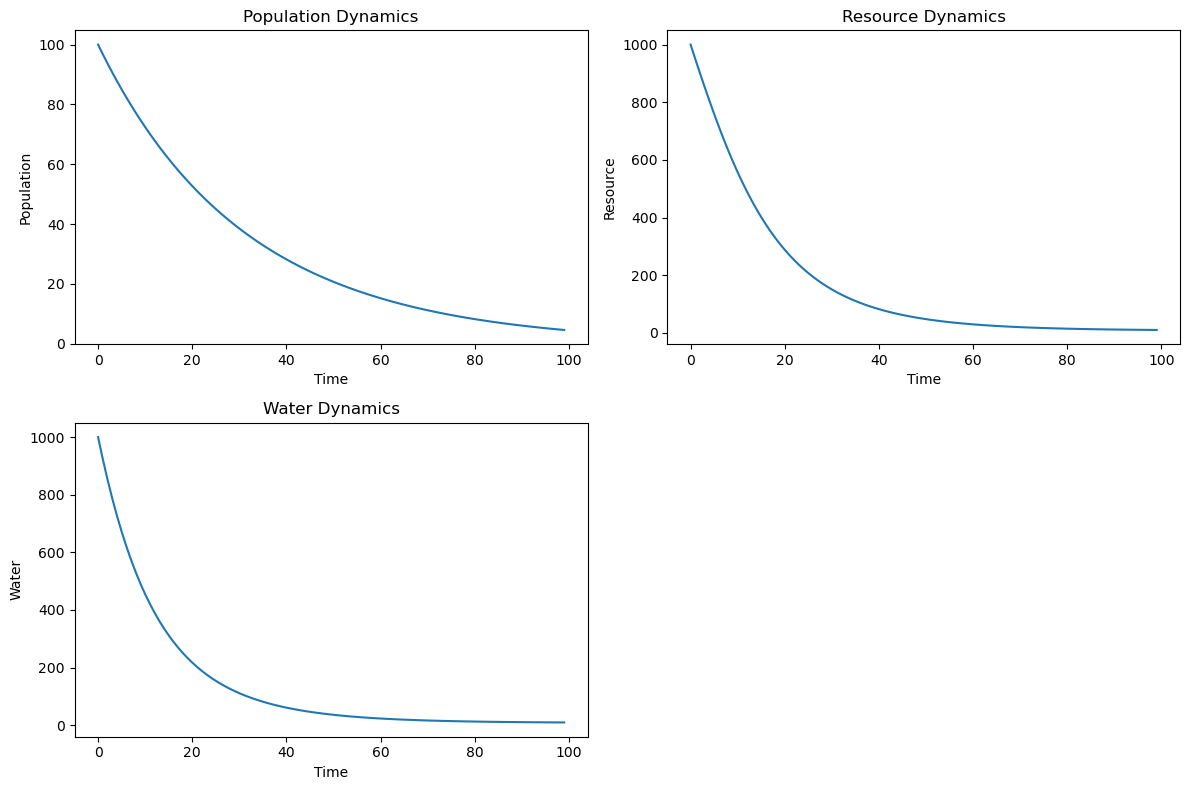

In [7]:
# Simulation for population dynamics
simulation_time = 100
initial_population = 100
time_population, population = simulate_population(r_P, K_P, F, K_F, d_P, initial_population, simulation_time)

# Simulation for resource dynamics
initial_resource = 1000
time_resource, resource = simulate_resource(r_F, K_F, c_F, d_F, initial_resource, population, simulation_time)

# Simulation for water dynamics
initial_water = 1000
time_water, water = simulate_water(r_W, K_W, c_W, d_W, initial_water, population, simulation_time)

# Plotting population dynamics and resource dynamics
plt.figure(figsize=(12, 8))

# Population Dynamics plot
plt.subplot(2, 2, 1)
plt.plot(time_population, population)
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population Dynamics')

# Resource Dynamics plot
plt.subplot(2, 2, 2)
plt.plot(time_resource, resource)
plt.xlabel('Time')
plt.ylabel('Resource')
plt.title('Resource Dynamics')

# Simulation for water dynamics
initial_water = 1000
time_water, water = simulate_water(r_W, K_W, c_W, d_W, initial_water, population, simulation_time)

# Plotting water dynamics
plt.subplot(2, 2, 3)
plt.plot(time_water, water)
plt.xlabel('Time')
plt.ylabel('Water')
plt.title('Water Dynamics')

plt.tight_layout()
plt.show()